# Data Pre-Processing

### Import Packages and CSV

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)
#Create Dataframe
df = pd.read_csv(r"IRIS.csv")
#print shape of dataset
print(df.shape)

(150, 5)


## Data Cleaning

### Handling Missing values

* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check the Null Values

In [30]:
## these are the features with nan values
features_with_na=[features for features in df.columns if df[features].isnull().sum() >=1]
for feature in features_with_na :
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

In [31]:
features_with_na

[]

* There are no null values in the dataset

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [32]:
duplicate =df[df.duplicated(keep= False)]
print(duplicate)

     sepal_length  sepal_width  petal_length  petal_width         species
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica


* **There are three duplicate value**
* **Remove these rows**

In [33]:
bool_series = df.duplicated()
df = df[~bool_series]

In [34]:
df.duplicated().sum()

0

* **All duplicate values are removed**

# Feature Engineering

## Feature Extraction

* **All features are relevant ,so no need to extract any feature**

## Types of Feature

**Numerical Feature**

In [35]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :',len(num_features))

Num of Numerical Features : 4


**Categorical Features**

In [36]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Feature :',len(cat_features))

Num of Categorical Feature : 1


**Discreate features**

In [37]:
threshold_value = 5 #as the total sample are too small (150)
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= threshold_value]
print('Num of Discrete Feature :',len(discrete_features))

Num of Discrete Feature : 0


**Continues Features**

In [38]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Feature :',len(continuous_features))

Num of Continuous Feature : 4


### Split X and Y

* Split Dataframe to X and y
* Here we set a variable X i.e. independent columns, and a variable y i.e. dependent columns as the "Species" column. 

In [39]:
X = df.drop('species', axis =1 )
y = df['species']

In [40]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

## Feature Transformation

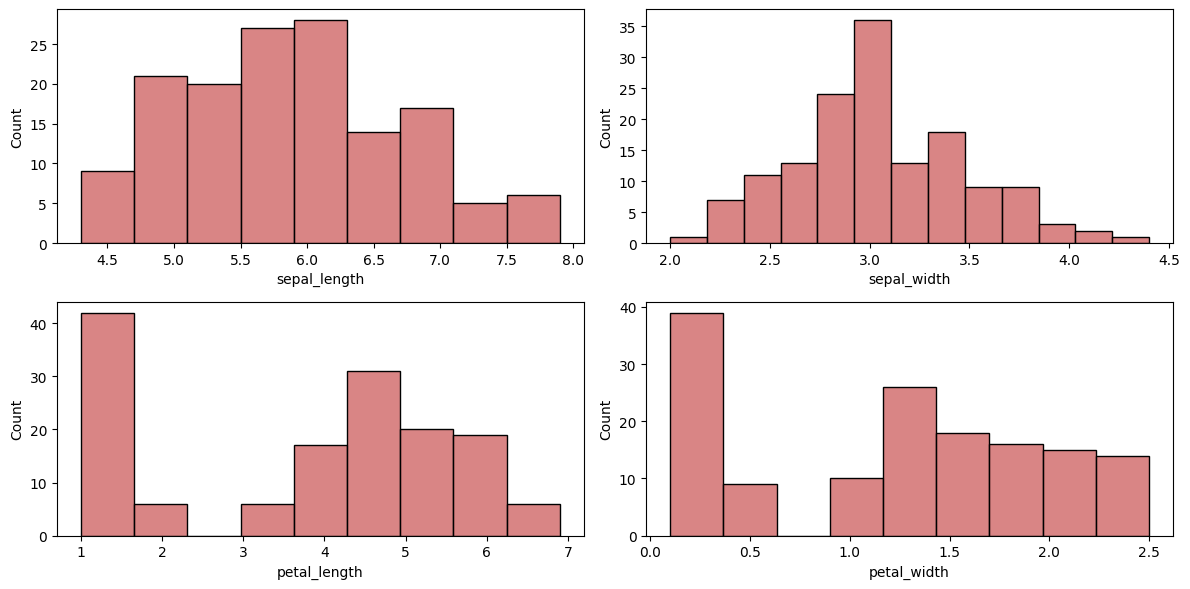

In [41]:
# distribution of data before scaling
plt.figure(figsize=(12,6))
for i,col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2,2,i+1)
    sns.histplot(X[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Data is not skewed so no need to perform any transformation**

In [42]:
#check the skewness
X[continuous_features].skew(axis=0, skipna=True)

sepal_length    0.292560
sepal_width     0.324351
petal_length   -0.293763
petal_width    -0.113479
dtype: float64

## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [43]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [44]:
num_features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

### **Preprocessing using Column Transformer**

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [46]:
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [47]:
X = preprocessor.fit_transform(X)

## Perform the Ordinal Encoding on output feature (Species)

In [48]:
from sklearn.preprocessing import OrdinalEncoder


In [49]:
y = pd.DataFrame(y) #Change the series to dataframe

In [50]:
ordinal_encoder = OrdinalEncoder()
y = ordinal_encoder.fit_transform(y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [51]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((117, 4), (30, 4))

In [52]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

In [53]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted,average=None) # Calculate F1-score
    precision = precision_score(true, predicted,average=None) # Calculate Precision
    recall = recall_score(true, predicted,average=None)  # Calculate Recall
    #roc_auc = roc_auc_score(true, predicted,average=None,multi_class='ovo') #Calculate Roc
    return acc, f1 , precision, recall#, roc_auc

In [54]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    #"XGBClassifier": XGBClassifier(), 
     #"CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [61]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {}".format(model_train_accuracy))
        print('- F1 score: {}'.format(model_train_f1)) 
        print('- Precision: {}'.format(model_train_precision))
        print('- Recall: {}'.format(model_train_recall))
        #print('- Roc Auc Score: {}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {}'.format(model_test_f1))
        print('- Precision: {}'.format(model_test_precision))
        print('- Recall: {}'.format(model_test_recall))
        #print('- Roc Auc Score: {}'.format(model_test_rocauc_score))
        #auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [62]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0
- F1 score: [1. 1. 1.]
- Precision: [1. 1. 1.]
- Recall: [1. 1. 1.]
----------------------------------
Model performance for Test set
- Accuracy: 0.9333333333333333
- F1 score: [1.         0.9        0.88888889]
- Precision: [1.         0.9        0.88888889]
- Recall: [1.         0.9        0.88888889]


Decision Tree
Model performance for Training set
- Accuracy: 1.0
- F1 score: [1. 1. 1.]
- Precision: [1. 1. 1.]
- Recall: [1. 1. 1.]
----------------------------------
Model performance for Test set
- Accuracy: 0.9333333333333333
- F1 score: [1.         0.9        0.88888889]
- Precision: [1.         0.9        0.88888889]
- Recall: [1.         0.9        0.88888889]


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0
- F1 score: [1. 1. 1.]
- Precision: [1. 1. 1.]
- Recall: [1. 1. 1.]
----------------------------------
Model performance for Test set
- Accuracy: 0.9333333333333333
- F1 score: [1.       